<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Елизавета! Мы уже встречались на предыдущем проекте, но представлюсь повторно.  Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы».


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Привет! Рада знакомству! Чувствую работа будет долгой 🙂. погнали </b></font>


# Определение соответствия описания фото


Описание данных:
- **train_dataset.csv** -  информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний.
- **train_images** - изображения для тренировки модели
- **CrowdAnnotations.tsv** -  данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных (имя файла изображения; идентификатор описания; доля людей, подтвердивших, что описание соответствует изображению; количество человек, подтвердивших, что описание соответствует изображению; количество человек, подтвердивших, что описание не соответствует изображению).
- **ExpertAnnotations.tsv** - данные по соответствию изображения и описания, полученные в результате опроса экспертов (имя файла изображения; идентификатор описания).
- **test_queries.csv** - находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний.
- **test_images** - содержатся изображения для тестирования модели.


## Импорт библиотек и загрузка данных

In [ ]:
!pip install deepface -q

In [ ]:
import random
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, zipfile, io, requests
from PIL import Image
# from collections import Counter
from sklearn.preprocessing import Normalizer
from deepface import DeepFace
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel
import torchvision.models as models
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.model_selection import GroupShuffleSplit
from scipy.stats import spearmanr

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [ ]:
random.seed(42)

In [ ]:
# Папка для данных
data_dir = "data"
os.makedirs(data_dir, exist_ok=True)

url = "https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip"

def download_and_extract(url, target_dir):
    """Скачать и распаковать архив по ссылке"""
    r = requests.get(url, stream=True)
    r.raise_for_status()
    with zipfile.ZipFile(io.BytesIO(r.content)) as z:
        z.extractall(target_dir)
        print("✅ Датасет скачан и распакован")
        return z.namelist()


files = download_and_extract(url, data_dir)
print("Файлы в архиве:", files[:20])  # посмотрим первые 20


✅ Датасет скачан и распакован
Файлы в архиве: ['to_upload/', 'to_upload/test_images/', 'to_upload/test_images.csv', '__MACOSX/to_upload/._test_images.csv', 'to_upload/.DS_Store', '__MACOSX/to_upload/._.DS_Store', 'to_upload/train_dataset.csv', '__MACOSX/to_upload/._train_dataset.csv', 'to_upload/ExpertAnnotations.tsv', '__MACOSX/to_upload/._ExpertAnnotations.tsv', 'to_upload/CrowdAnnotations.tsv', '__MACOSX/to_upload/._CrowdAnnotations.tsv', 'to_upload/train_images/', 'to_upload/test_queries.csv', '__MACOSX/to_upload/._test_queries.csv', 'to_upload/test_images/3459871361_92d1ecda36.jpg', '__MACOSX/to_upload/test_images/._3459871361_92d1ecda36.jpg', 'to_upload/test_images/3044745642_1d0784ff29.jpg', '__MACOSX/to_upload/test_images/._3044745642_1d0784ff29.jpg', 'to_upload/test_images/1468389504_c724bdcad0.jpg']


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [ ]:
# Пути
train_path = os.path.join(data_dir, "to_upload", "train_dataset.csv")
crowd_path = os.path.join(data_dir, "to_upload", "CrowdAnnotations.tsv")
expert_path = os.path.join(data_dir, "to_upload", "ExpertAnnotations.tsv")
test_path  = os.path.join(data_dir, "to_upload", "test_queries.csv")

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень круто, что ты не хардкодишь пути, а используешь базовую константу - путь к папке с данными </div>

In [ ]:
# Чтение
train_df = pd.read_csv(train_path, quotechar='"')
crowd_df   = pd.read_csv(crowd_path, sep="\t", header=None)
expert_df  = pd.read_csv(expert_path, sep="\t", header=None)
test_df = pd.read_csv(test_path, sep="|")

In [ ]:
# Смотрим
print("train_dataset:", train_df.shape)
print("CrowdAnnotations:", crowd_df.shape)
print("ExpertAnnotations:", expert_df.shape)
print("test_queries:", test_df.shape)

train_dataset: (5822, 3)
CrowdAnnotations: (47830, 5)
ExpertAnnotations: (5822, 5)
test_queries: (500, 4)


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
При загрузке экспертных оценок ты потеряла первую строку с данными, которая стала заголовком. Корректный размер датафрейма с экспертными оценками 5822.

</div>


путь к папке с изображениями

In [ ]:
train_images_dir = os.path.join(data_dir, "to_upload", "train_images")

Получаем все пути к файлам

In [ ]:
image_paths = [os.path.join(train_images_dir, f) for f in os.listdir(train_images_dir) if f.endswith((".jpg", ".png"))]

print(f"Всего изображений: {len(image_paths)}")

Всего изображений: 1000


Выведем несколько изображений

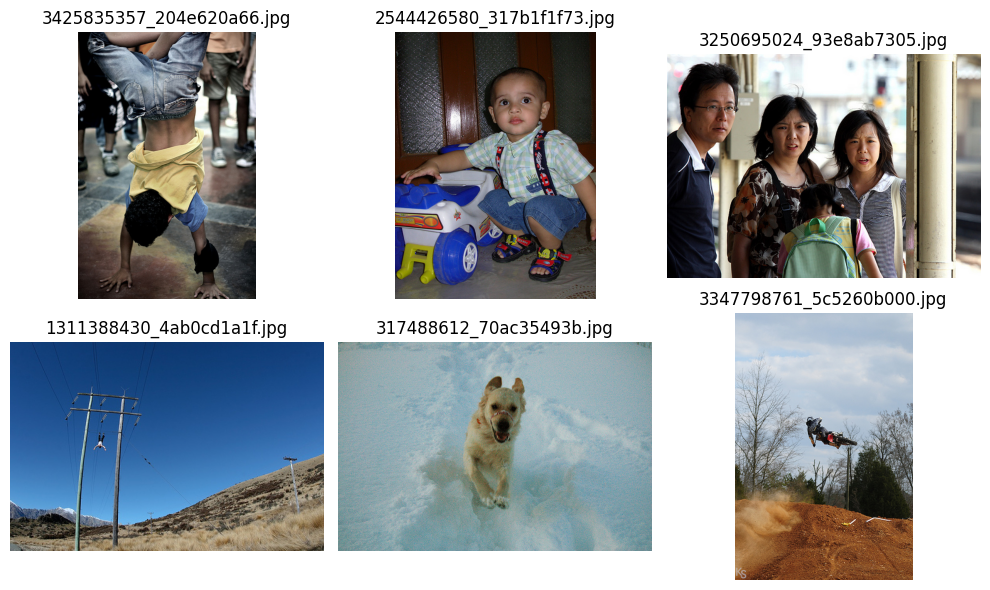

In [ ]:
sample_paths = random.sample(image_paths, 6)

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for ax, img_path in zip(axes.flatten(), sample_paths):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(os.path.basename(img_path))
    ax.axis('off')

plt.tight_layout()
plt.show()

У нас много изображений с детьми (которые надо отфильтровать по условию задачи). Также есть изображения толпы, что может стать проблемой при детекции детей. Датасет содержит не только изображения людей

Получим пути к тестовым изображениям тоже

In [ ]:
test_images_dir = os.path.join(data_dir, "to_upload", "test_images")

test_image_paths = [os.path.join(test_images_dir, f)
                    for f in os.listdir(test_images_dir)
                    if f.endswith((".jpg", ".png"))]

print(f"Всего тестовых изображений: {len(test_image_paths)}")

Всего тестовых изображений: 100


## Предобработка данных

In [ ]:
crowd_df.head(3)

,0,1,2,3,4
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3


Присвоим свой нейминг столбцам

In [ ]:
crowd_df.columns = ["image",         # Имя файла изображения
                    "query_id",      # Идентификатор описания
                    "fraction_yes",  # Доля людей, подтвердивших, что описание соответствует
                    "count_yes",     # Количество человек, подтвердивших, что описание соответствует
                    "count_no"]       # Количество человек, подтвердивших, что описание не соответствует

crowd_df.head(3)

,image,query_id,fraction_yes,count_yes,count_no
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Не советую использовать функцию `print()` для вывода датафреймов, получается не очень красиво. В большинстве случаев можно вообще обойтись без команды, достаточно обратиться к таблице в последней строке ячейки. Или использовать функцию `display()`
    

</div>

In [ ]:
expert_df.head(3)

,0,1,2,3,4
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2


In [ ]:
expert_df.columns = ["image",         # Имя файла изображения
                     "query_id",      # Идентификатор описания
                     "expert_1",      # Оценка первого эксперта
                     "expert_2",      # Оценка второго эксперта
                     "expert_3"]       # Оценка третьего эксперта
expert_df.head(3)

,image,query_id,expert_1,expert_2,expert_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2


In [ ]:
train_df.tail(3)

,image,query_id,query_text
5819,909808296_23c427022d.jpg,2112921744_92bf706805.jpg#2,A dog stands on the side of a grassy cliff .
5820,929679367_ff8c7df2ee.jpg,3651971126_309e6a5e22.jpg#2,A blurry photo of two dogs .
5821,968081289_cdba83ce2e.jpg,2292406847_f366350600.jpg#2,A man rows his boat below .


In [ ]:
train_df['image'].nunique()

1000

У нас всего 1000 картинок, а строчек много - потому что каждая картинка имеет несколько описаний

In [ ]:
test_df.tail(3)

,Unnamed: 0,query_id,query_text,image
497,497,989851184_9ef368e520.jpg#2,A black dog holding a weight in its mouth stan...,989851184_9ef368e520.jpg
498,498,989851184_9ef368e520.jpg#3,A black dog holds a small white dumbbell in it...,989851184_9ef368e520.jpg
499,499,989851184_9ef368e520.jpg#4,The black dog has a toy in its mouth and a per...,989851184_9ef368e520.jpg


Сделаем лишний столбец в тесте индексом

In [ ]:
test_df.set_index("Unnamed: 0", inplace=True)
test_df.index.name = None

Смотрим колонки и пропуски

In [ ]:
dfs = {"train": train_df, "crowd": crowd_df, "expert": expert_df, "test": test_df}

for name, df in dfs.items():
    print(f"=== {name} ===")
    print(df.info())
    print(f"количество дубликатов: {df.duplicated().sum()}")
    print("\n")

=== train ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB
None
количество дубликатов: 0


=== crowd ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         47830 non-null  object 
 1   query_id      47830 non-null  object 
 2   fraction_yes  47830 non-null  float64
 3   count_yes     47830 non-null  int64  
 4   count_no      47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB
None
количество дубликатов: 0


=== expert ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821


Пропусков нет, явных дубликатов нет ни в одном датасете. Проверим адекватность данных

In [ ]:
expert_df.describe().T

,count,mean,std,min,25%,50%,75%,max
expert_1,5822.0,1.436620,0.787084,1.0,1.0,1.0,2.0,4.0
expert_2,5822.0,1.624356,0.856222,1.0,1.0,1.0,2.0,4.0
expert_3,5822.0,1.881999,0.904087,1.0,1.0,2.0,2.0,4.0


Данные выглядят адекватными. Эксперт 3 чуть более лоялен и чаще ставит оценку 2

In [ ]:
crowd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraction_yes,47830.0,0.068786,0.207532,0.0,0.0,0.0,0.0,1.0
count_yes,47830.0,0.208488,0.628898,0.0,0.0,0.0,0.0,5.0
count_no,47830.0,2.820155,0.656676,0.0,3.0,3.0,3.0,6.0


Данные тоже выглядят адекватно. Люди чаще отмечают, что описание не соответствует картинке


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 У тебя получился раздел где совмещены предобработка и знакомство с данными. В целом все корректно, мы готовы к дальнейшей работе </div>

### Агрегация оценок, для получения итогового таргета

Наша задача в таргете получить вероятность совпадения. Возьмем среднюю оценку экспертов( исключая те случаи, где все эксперты поставили разную оценку), а не определять мажоритарным голосованием (за какую оценку больше проголосовало - ту и ставим) и затем нормализовать эту оценку .

In [ ]:
def mean_vote(row):
    """
    Возвращает среднюю оценку по трём экспертам.
    Если все три оценки разные — возвращает None.
    """
    votes = [row["expert_1"], row["expert_2"], row["expert_3"]]
    # если множество из голосов равно 3 - все оценки разные
    if len(set(votes)) == 3:
        return None
    return sum(votes) / len(votes)

Применим к экспертным данным и дропнем в новый датасет (после фильтрации) где нет единой оценки

In [ ]:
expert_df["mean_vote"] = expert_df.apply(mean_vote, axis=1)
expert_mean_df = expert_df.dropna(subset=["mean_vote"])

In [ ]:
expert_mean_df = expert_mean_df.drop(columns=['expert_1','expert_2','expert_3'])

 Посмотрим сколько % инфы потеряли, когда отбросили строки без единой оценки

In [ ]:
round((1 - expert_mean_df.shape[0]/expert_df.shape[0])*100,2)

2.16

Потеряли приемлемо. Получили df со средней экспертной оценкой, нормализуем ее

In [ ]:
expert_mean_df["expert_norm"] = (expert_mean_df["mean_vote"] - 1) / 3

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Чтобы привести к шкале 0-1 я бы посоветовал использовать линейное преобразование "минус 1 разделить на 3". Формально результат будет тем же самым, но обучение скаллера на всех данных (а не на обучающей выборке) может стать вызвать лишние вопросы, если проект будет в портфолио.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> м,угу. я поняла в чем вопрос. </b></font>

In [ ]:
expert_mean_df.head(3)

,image,query_id,mean_vote,expert_norm
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1.000000,0.000000
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1.333333,0.111111
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1.333333,0.111111


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

По объединению экспертных и крауд оценок все ОК, но подсвечу возможные альтернативы
    
--------------    
    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> логично. Казалось что раз есть крауд и его можно использовать почему бы не использовать (все-таки большая работа по сбору данных) - оценка крауда может сгладить спорные моменты. Но если рассматривать в том ключе как во втором варианте, наверное лучше  оставить только экспертные оценки </b></font>

Ура, у нас есть скалированный таргет, теперь добавим его в train. Будем мерджить по двум ключам (image и query_id), чтобы получить точное совпадение

In [ ]:
train_df.head(3)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


In [ ]:
main_df = train_df.merge(expert_mean_df[["image", "query_id", "expert_norm"]],
    on=["image", "query_id"], how="inner")

In [ ]:
main_df.shape

(5696, 4)

In [ ]:
main_df = main_df.rename(columns={"expert_norm": "target"})

итого, наш обучающий датасет main_df:

In [ ]:
main_df.head(3)

,image,query_id,query_text,target
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.222222


In [ ]:
main_df.isna().sum()

,0
image,0
query_id,0
query_text,0
target,0


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> ОК, получен основной датафрейм признаки/таргет, с которым мы можем продолжить работу </div>

## Фильтрация запрещенных изображений

 В столбце query_text есть описание изображения, которое можно проверить на стоп-слова. Также есть столбец query_id в котором указан номер комментария и в нем же зашит номер изображения к которому этот комментарий относится. Разметим все строки на наличие стоп-слов, затем у строк с флагом возьмем номер комментария и извлечем из него номер изображения. Таким образом получим список изображений которые не проходят по возрасту

В train бан-изображения мы удалим, чтобы модель не училась на запрещённом.


В тесте такие строки оставим, но выведем дисклеймер: 'This image is unavailable in your country in compliance with local laws'

### Текстовая фильтрация

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
В этом блоке реализован подход, который приводит к ошибочной фильтрации данных.

Логика определяет список "запрещенных" изображений на основе наличия ключевых слов в сопоставленных с ними описаниях. Однако, `train_dataset` содержит **случайные** пары "картинка-описание".

В результате, если с изображением, на котором нет детей (например, с автомобилем), случайно оказывается в паре описание со словом "schoolboy", то изображение автомобиля ошибочно попадает в список "запрещенных" и полностью удаляется из обучающей выборки. Такой подход ведет к необоснованной потере значительной части корректных данных.

    

Дам подсказку. Существует хитрый лайфхак, как это сделать в этом проекте. . Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список комментариев с детьми фильтрацией по ключевым словам
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
        
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>да, это все конечно ловко придумано. меня тоже смутил этот момент случайных пар (но с нейросетью и возрастом почему-то вышла чушь).  
    вот этот подход про query_id	кажется немного читерством (как бы неуверсальное решение основанное на особенности датасета. а потом в продакшн картинки запишут по-другому и все поломается). но сейчас так будет чище, поэтому переделаем </b></font>

Свяжем строки train_filtered с их файлами на диске.

In [ ]:
main_df["image_path"] = main_df["image"].apply(lambda x: os.path.join(train_images_dir, x))
test_df["image_path"] = test_df["image"].apply(lambda x: os.path.join(test_images_dir, x))

Список стоп-слов

In [ ]:
hard_ban=['schoolboy', 'schoolgirl', 'toddler', 'preschooler', 'kindergartener', 'pupil',
          'baby carriage', 'playground child', 'school teen', 'baby girl', 'baby boy', 'children',
          'young girl', 'young boy','newborn', 'baby', 'child', 'kid', 'kids', 'infant', 'boy', 'girl']


In [ ]:
def filter_by_stopwords(df, text_column="query_text"):
    """
    Фильтруем текст по стоп-словам
    """
    df = df.copy()
    text_lower = df[text_column].str.lower()
    df["is_banned"] = text_lower.str.contains("|".join(hard_ban), na=False)

    return df

Сначала разметим строки по стоп-словам

In [ ]:
train_marked = filter_by_stopwords(main_df)

Формируем выборку с "плохими" строками.

In [ ]:
bad_train = train_marked.query('is_banned==True')

Вытаскиваем номера забаненых изображений:

In [ ]:
bad_train["image_id"] = bad_train["query_id"].str.split("#").str[0]

In [ ]:
print('кол-во бан-изображений, трейн',bad_train["image_id"].nunique())

кол-во бан-изображений, трейн 291


Получаем наш тренировочный отфильтрованный датасет

In [ ]:
train_filtered = main_df[~main_df["image"].isin(bad_train["image_id"])].copy()

Берём случайные 6 изображений из оставшихся

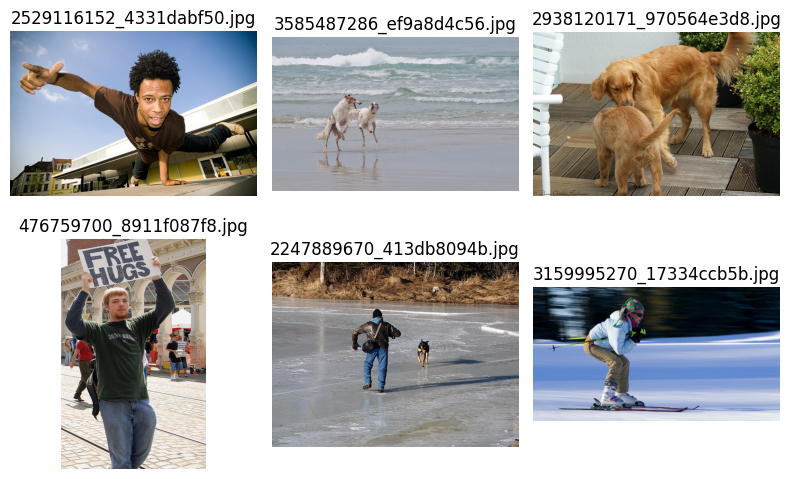

In [ ]:
sample_paths = random.sample(
    list(train_filtered["image_path"].unique()),
    min(6, train_filtered["image_path"].nunique())
)

fig, axes = plt.subplots(2, 3, figsize=(8, 5))
for ax, img_path in zip(axes.flatten(), sample_paths):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(os.path.basename(img_path))
    ax.axis('off')

plt.tight_layout()
plt.show()

Детей нет, фильтрация прошла успешно

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Раздел, посвященный фильтрации, содержит много экспериментов и разных подходов, но его структура затрудняет понимание, какой из методов является итоговым. Промежуточные, ошибочные варианты кода не удалены и смешаны с более удачными реализациями, что создает путаницу. Пожалуйста удали лишнее и оставь то, что действительно необходимо.

Важно отметить, что финальная логика, примененная к тестовой выборке, приводит к удалению почти 45% изображений. Это очень высокий показатель, который является следствием использования упрощенного подхода (фильтрации по словам без учета релевантности описания). При более аккуратной фильтрации, которая учитывает и ключевые слова, и степень соответствия описания картинке, ожидаемая доля удаленных изображений составляет около 30%. Рекомендуется унифицировать подход к фильтрации для обучающей и тестовой выборок, используя наиболее точный из найденных методов.    
</div>

В итоге наш отфильтрованный рабочий датасет называется **train_filtered**

## Извлечение текстовых эмбеддингов (BERT)

In [ ]:
MODEL_NAME = "bert-base-uncased"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME)
model.eval()  # выключаем dropout

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
texts = train_filtered["query_text"].astype(str).tolist()

получаем эмбеддинги

In [ ]:
text_embeddings = []

In [ ]:
with torch.no_grad():
    for text in tqdm(texts):
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=64)
        outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
        text_embeddings.append(cls_embedding)

text_embeddings = np.array(text_embeddings)
print("Shape of text_embeddings:", text_embeddings.shape)

100%|██████████| 3994/3994 [11:55<00:00,  5.59it/s]

Shape of text_embeddings: (3994, 768)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично,полученные векторные представления для текстов описаний с помощью BERT </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

    
<b>Этот комментарий исключительно для развития, ничего менять в проекте сейчас не нужно.</b>

Молодец, что используешь эмбеддинг с CLS-токена — это стандартный подход для извлечения представления текста, особенно если модель была обучена на задаче NSP (Next Sentence Prediction), как это было с оригинальным BERT.

Однако стоит учитывать, что не все энкодерные архитектуры обучались на задаче NSP (например, DistilBERT).

На практике часто используют пулинг (например, средний) по всем выходным токенам (кроме паддингов), чтобы получить более общее представление текста. Многие исследователи отмечают, что при этом качество эмбеддингов оказывается выше. Если встретишь такой подход в чужом коде (или туториале), не удивляйся.

Вот пример реализации такого подхода:
    

```python
def preprocess_text_with_pooling(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding='max_length', max_length=128).to(device)
    attention_mask = inputs['attention_mask']
    with torch.no_grad():
        outputs = distilbert_model(**inputs)

    last_hidden_state = outputs.last_hidden_state

    # Убираем влияние паддинг-токенов
    attention_mask = attention_mask.unsqueeze(-1)
    masked_hidden_state = last_hidden_state * attention_mask
    sum_hidden_states = masked_hidden_state.sum(dim=1)
    sum_mask = attention_mask.sum(dim=1)
    mean_hidden_state = sum_hidden_states / sum_mask

    return mean_hidden_state
```

Такой подход позволяет учесть всю доступную информацию в тексте, исключая влияние токенов-паддингов, что иногда даёт более качественные эмбеддинги.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Подсвечу желтым, чтобы не потерялось.
    
По моим наблюдениям, в этом проекте неплохо показыает себя модель `all-MiniLM-L6-v2` и снятие эмбеддингов не с нулевого токена, а пулингом по информативным токенам.
    
Запустить её можно либо через transformers, либо через sentence-transformers    
    
https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2    
</div>

In [ ]:
text_norm = Normalizer(norm='l2')

In [ ]:
text_embeddings_norm = text_norm.fit_transform(text_embeddings)

In [ ]:
np.save("text_embeddings_norm.npy", text_embeddings_norm)

In [ ]:
text_embeds_df_train = pd.DataFrame(text_embeddings_norm, index=train_filtered["query_id"])
text_embeds_df_train["query_id"] = train_filtered["query_id"].values
text_embeds_df_train["image_path"] = train_filtered["image_path"].values

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Вижу что ты вычисляешь эмбеддинги дл тестовых описаний. Сразу скажу - делать это не нужно и вредно.
    
Тут два аспекта:
    
 - с точки зрения логики "последующего тестирования" лучше выполнять векторизацию тестовых запросов "на лету", это позволит создать универсальный подход, который будет работать с любым текстом
 - фильтрацию запросов от "детского" контента тоже лучше выполнять в теле функции по поиску изображений по описанию.  Это позволит убедиться, что в случае,  если пользователь запросит у нас изображение с ребенком, он получит дисклеймер, а не изображение
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> попробуем реализовать</b></font>

## Векторизация изображений

делаем список уникальных путей

In [ ]:
unique_paths = train_filtered['image_path'].unique().tolist()

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, image_paths, transform):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        path = self.image_paths[idx]
        img = Image.open(path).convert("RGB")
        return self.transform(img), path

Преобразования для изображений (нормализация по ImageNet)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
resnet18 = models.resnet18(pretrained=True)
resnet18 = torch.nn.Sequential(*list(resnet18.children())[:-1])
resnet18.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

хотим gpu по возможности

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = resnet18.to(device)

делаем батчами через загрузчик

In [ ]:
dataset = ImageDataset(unique_paths, transform)
loader = DataLoader(dataset, batch_size=32, shuffle=False)

In [ ]:
img2emb = {}
with torch.no_grad():
    for batch_imgs, batch_paths in tqdm(loader, desc="Embedding images"):
        batch_imgs = batch_imgs.to(device)
        emb = resnet18(batch_imgs).squeeze()  # (batch, 512, 1, 1) -> squeeze
        emb = emb.view(emb.size(0), -1).cpu().numpy()  # (batch, 512)

        for path, e in zip(batch_paths, emb):
            img2emb[path] = e

Embedding images: 100%|██████████| 23/23 [00:43<00:00,  1.91s/it]


Преобразуем в DataFrame и мапим обратно

In [ ]:
image_embeddings = np.array([img2emb[p] for p in train_filtered["image_path"]])
print("Shape of image embeddings:", image_embeddings.shape)

Shape of image embeddings: (3994, 512)


In [ ]:
image_embeddings

array([[0.80274636, 3.3569133 , 2.5148606 , ..., 0.1619432 , 0.78213936,
        0.06440645],
       [0.23398976, 1.4876038 , 1.3025225 , ..., 0.6501811 , 0.09419873,
        1.3652925 ],
       [2.4115825 , 0.9138615 , 1.2702597 , ..., 1.8841938 , 0.67997617,
        1.0144013 ],
       ...,
       [1.2620654 , 1.9104826 , 1.6244099 , ..., 0.600004  , 1.1486034 ,
        0.4611098 ],
       [1.7073578 , 0.1318155 , 0.47854245, ..., 0.63114923, 1.1907165 ,
        0.53927493],
       [0.8371821 , 0.6933662 , 0.4371334 , ..., 1.3090591 , 0.6644823 ,
        0.15310195]], dtype=float32)

In [ ]:
img_norm = Normalizer(norm='l2')

In [ ]:
image_embeddings_norm = img_norm.fit_transform(image_embeddings)

In [ ]:
np.save("image_embeddings_norm_resnet18.npy", image_embeddings_norm)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, вектра для изображений получены👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Подход к векторизации изображений с помощью предобученной СNN-модели выбран верно.

Однако в текущей реализации есть существенный аспект, связанный с неоптимальной производительностью. Код итерируется по всем строкам датафрейма. Так как одно и то же изображение встречается в данных многократно (с разными описаниями), оно загружается с диска и обрабатывается нейросетью несколько раз. Это приводит к большому количеству лишних вычислений и значительно замедляет весь процесс.

Более эффективным подходом было бы сначала составить список **уникальных** путей к изображениям, получить эмбеддинги для каждой картинки только один раз, сохранить их (например, в словарь), а затем уже для каждой строки исходного датафрейма подставлять соответствующий, заранее вычисленный, вектор.

Дополнительно, для ускорения расчетов, рекомендуется обрабатывать изображения не по одному в цикле, а батчами (пакетами). Передача в модель сразу группы изображений позволяет гораздо эффективнее использовать ресурсы вычислительного устройства (GPU/CPU).  
</div>

In [ ]:
image_embeds_df_train = pd.DataFrame(image_embeddings_norm, index=train_filtered["query_id"])
image_embeds_df_train["query_id"] = train_filtered["query_id"].values
image_embeds_df_train["image_path"] = train_filtered["image_path"].values

размерность правильная (3841 картинок, У ResNet-18 последний сверточный блок содержит 512 каналов. После avgpool каждый канал усредняется - получается вектор из 512 значений).

Наша задача — построить модель, которая по текстовому описанию и картинке предсказывает насколько они соответствуют друг другу (вероятность от 0 до 1).

у нас есть:

**text_embeddings** (размерность (n, 768))

**image_embeddings** (размерность (n, 512) из ResNet-18)

**target** (комбинированная оценка соответствия от экспертов/крауда)

Теперь нам **нужно их объединить в итоговый вектор** признаков и подготовить данные для модели.

Проверяем, что количество текстов и изображений совпадает

In [ ]:
assert text_embeddings_norm.shape[0] == image_embeddings_norm.shape[0]

## Объединяем фичи

In [ ]:
text_embeds_df_train = text_embeds_df_train.reset_index(drop=True)
image_embeds_df_train = image_embeds_df_train.reset_index(drop=True)

In [ ]:
features_train = text_embeds_df_train.merge(image_embeds_df_train,on=["query_id", "image_path"],suffixes=("_text", "_img"))
print("Train features shape:", features_train.shape)

Train features shape: (3994, 1282)


In [ ]:
features_train["query_id"] = text_embeds_df_train["query_id"].values
features_train["image_path"] = text_embeds_df_train["image_path"].values

In [ ]:
targets_df = train_filtered[["query_id", "image_path", "target"]]

In [ ]:
df_train = features_train.merge(targets_df, on=["query_id", "image_path"])

для теста

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    

Пропущен важный шаг — масштабирование признаков. Это не просто рекомендация, а почти обязательное действие, отсутствие которого напрямую повлиет на твои результат, например нейронная сеть может обучаться медленнее и нестабильнее, также возмжоны проблемы с обычными линейными моделями.

Однако просто взять обычный `StandardScaler` здесь было бы ошибкой. Этот инструмент отлично подходит для обычных табличных данных, но он может «испортить» эмбеддинги, так как работает *поколоночно* и разрушает внутреннюю геометрию векторов, в которой и заключен весь их смысл.

Самый правильный и современный подход для твоей задачи — это **раздельная L2-нормализация** векторов перед их объединением.

Вот как это выглядит на практике:
1.  **Сначала** ты берешь все векторы изображений (из `ResNet`) и нормализуешь их отдельно с помощью `Normalizer(norm='l2')`.
2.  **Потом** ты берешь все векторы текстов (из `BERT`) и тоже нормализуешь их отдельно, своим экземпляром `Normalizer`'а.
3.  И только **после этого** ты конкатенируешь уже нормализованные векторы в единую матрицу признаков.

Что это дает? Ты приводишь оба типа векторов к сопоставимому масштабу (все они становятся векторами единичной длины), но при этом полностью сохраняешь семантическую структуру внутри каждого из пространств (пространства картинок и пространства текстов). Это самый надежный способ подготовить такие сложные признаки для модели.
    

</div>

Выделим валидационный сет (в этом проекте не будем использовать кросс-валидацию, потому что это демонстрационный проект. Нам лучше посчитать быстрее,небольшая потеря точности не так критична, надо просто показать что идея работает)

Преобразуем данные в тензоры

In [ ]:
feature_cols = [c for c in df_train.columns if isinstance(c, str) and (c.endswith("_text") or c.endswith("_img"))]

In [ ]:
X = np.array(df_train[feature_cols].values, dtype=np.float32)
y = df_train["target"].values.astype(np.float32)

группы по  image_path

In [ ]:
groups = df_train["image_path"].values

gss = GroupShuffleSplit(n_splits=1, train_size=0.7, random_state=42)
train_idx, val_idx = next(gss.split(X, y, groups=groups))

train = df_train.loc[train_idx].reset_index(drop=True)
val = df_train.loc[val_idx].reset_index(drop=True)

X_train = train[feature_cols].values
y_train = train["target"].values

X_val = val[feature_cols].values
y_val = val["target"].values

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(2779, 1024) (2779,)
(1215, 1024) (1215,)


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Разбиение на обучающую и валидационную выборки произведено. Но что-бы избежать ситуации,когда одна и та же картинка фигурирует в обучении и валидации лучше использовать GroupShuffleSplit (есть в прекоде к проекту)</div>

Выберем метрику качества.
В нашей задаче мы предсказываем число — вероятность или степень соответствия пары (текст, изображение). Фактически у нас регрессионная задача: target [0, 1] — чем выше, тем лучше соответствие.

Нам подходят:
- MSE / RMSE это классическая метрика для регрессии.
Хорошо отражает насколько сильно ошибаеемся в численном предсказании.

- MAE менее чувствителен к выбросам, чем RMSE. Но тоже полезно смотреть в качестве дополнительной метрики

- также ради интереса можно попробовать новую метрику Spearman correlation (ρ). Она оценивает согласованность ранжирования, а не абсолютные значения. Очень часто используется именно для задач 'текст - изображение' (в CLIP-подобных моделях).


В качестве основной метрики возьмем RMSE

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В этом задании требуется выбрать основную метрику, которую ты будешь оптимизировать. Пожаулуйста выбери метрику и обоснуй свой выбор.  </div>

## Baseline. Линейная регрессия

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В качестве первой модели авторы проекта просят исследовать простую линейную регрессию.</div>

In [ ]:
ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, y_train)

y_pred_train = ridge_model.predict(X_train)
y_pred_val = ridge_model.predict(X_val)

In [ ]:

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

spearman_train = spearmanr(y_train, y_pred_train).correlation
spearman_val = spearmanr(y_val, y_pred_val).correlation

print(f"Train RMSE: {rmse_train:.4f}, Spearman: {spearman_train:.4f}")
print(f"Val RMSE: {rmse_val:.4f}, Spearman: {spearman_val:.4f}")

Train RMSE: 0.2364, Spearman: 0.5476
Val RMSE: 0.2576, Spearman: 0.3267


Метрики получились не очень хорошие, но ридж работает лучше обычной линейной регрессии (там было очень сильное переобучение)))

Небольшая разница между train и val (переобучение практически исчезло). Однако линейная зависимость между текстовыми и визуальными эмбеддингами всё ещё ограничена, модель не может хорошо предсказывать соответствие.
Spearman = 0.33 это умеренно положительная корреляция. Модель схватывает общий порядок пар 'текст - изображение', но ещё далеко до идеального ранжирования.

Мы получили стабильный baseline, теперь можно улучшать модель


## MLP модель

Преобразуем данные тренировочной и валидационной выборки в тензоры

In [ ]:
X_train_t = torch.from_numpy(X_train.astype(np.float32))
y_train_t = torch.from_numpy(y_train.astype(np.float32)).unsqueeze(1)
X_val_t = torch.from_numpy(X_val.astype(np.float32))
y_val_t = torch.from_numpy(y_val.astype(np.float32)).unsqueeze(1)

Конвертируем features_test в torch tensor

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

model = MLP(input_dim=X_train.shape[1])

In [ ]:
epochs = 100
batch_size = 32
lr = 1e-4
patience = 10
best_val_loss = np.inf
counter = 0

optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train_t.size(0))
    for i in range(0, X_train_t.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_X, batch_y = X_train_t[indices], y_train_t[indices]

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_t)
        val_loss_mse = criterion(val_pred, y_val_t).item()
        val_loss_rmse = np.sqrt(val_loss_mse)  # <- RMSE

    if val_loss_mse < best_val_loss:
        best_val_loss = val_loss_mse
        counter = 0
        best_model_state = model.state_dict()
    else:
        counter += 1

    if counter >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}, Val RMSE: {val_loss_rmse:.4f}")

Epoch 1, Val RMSE: 0.2443
Epoch 10, Val RMSE: 0.2437
Early stopping at epoch 12


In [ ]:
model.load_state_dict(best_model_state)

<All keys matched successfully>

In [ ]:
model.eval()
with torch.no_grad():
    y_val_pred = model(X_val_t).squeeze().numpy()

mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print(f"MLP -> MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

MLP -> MAE: 0.1642, MSE: 0.0582, RMSE: 0.2413, R²: 0.2069


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Цикл обучения реализован корректно, однако его можно сделать более эффективным и стабильным.

Обучение на протяжении фиксированного числа эпох (в данном случае 50) не всегда является оптимальной стратегией. Модель может начать переобучаться задолго до последней эпохи или, наоборот, не доучиться. Рекомендуется внедрить механизм **ранней остановки (Early Stopping)**, который будет отслеживать метрику на валидационной выборке (например, `val_loss`) и прекращать обучение, если она перестает улучшаться.

Также стоит обратить внимание на ключевые гиперпараметры обучения. **Шаг обучения (learning rate)** и **размер батча (batch size)** сильно влияют на итоговое качество модели. Эксперименты с разными значениями шага обучения (например, уменьшение до 1e-4 или даже  1e-5) или его динамическим изменением в процессе обучения, а также увеличение размера батча (например, до 128, 256 или даже вся выборка, если позволяет видеопамять) могут значительно улучшить результат.
    
-----------------------    
    
В случае с нейронками логика ипользования немного отличается от того, к чему мы привыкли в классических моделях. Здесь лучше работать по другой логике:
    
 - оределилили архитектуру, создали модель
 - начинаем её учить. и учим пока метрика на валидационной выборке улучшается.  Наблюдая в динамике метрики на обучающей и валидационной выборках.
 - если вдруг метрика на обучающей выборке перестала снижаться, можно попробовать уменьшить шаг обучения (например в 10 раз) и продолжить обучение модели.
    
В любом случае полезно обучать модель пока метрика на валидации улучшается. Наша цель - оптимальное состояние модели, при котором модель хорошо находит законмоерности в данных, но еще не переобучилась.
        
После того, как закончили обучение смотрим на логи, анализируем, чего модели не хватило, меняем архитектуру и запускаем обучение по новой.    
    

    

    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).

 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

    
Когда в будущем столкнешься с подобными мультимодальными задачами (сравнение данных разной природы, как текст и картинки), можешь попробовать более продвинутый архитектурный подход, который сейчас считается стандартом в индустрии — так называемую **"двухбашенную" архитектуру (Two-Tower Architecture)**.

Идея очень изящная. Вместо того чтобы сразу "склеивать" эмбеддинги картинки и текста в один длинный вектор, ты обрабатываешь их параллельно в двух отдельных небольших нейросетях ("башнях"). Одна "башня" учится работать только с текстовыми эмбеддингами, другая — только с эмбеддингами изображений. Каждая из них на выходе выдает вектор одинаковой, заранее заданной, размерности.

Таким образом, модель учится проецировать и текст, и картинки в единое смысловое пространство, где их можно эффективно сравнивать. Это позволяет ей глубже понять семантическую связь между объектами и часто дает более качественный и робастный результат. Воспринимай это как полезную информацию для будущих, более сложных проектов.    
</div>

## Собираем финальный submission

для теста пробуем сделать функцию онлайн-обработки запроса. Она включает в себя фильтрацию детского контента (у забаненых выведем дисклеймер), модель получения текстовых эмбеддингов и эмбеддингов картинок


In [ ]:

def predict_match(query_text, image_path, text_tokenizer, text_model, image_model, best_model_state, transform, hard_ban):
    """
    Предсказывает схожесть между текстом и изображением.
    Возвращает float (предсказание модели) или дисклеймер, если текст запрещён.
    """

    #  Фильтрация стоп-слов
    if any(stop_word in query_text.lower() for stop_word in hard_ban):
        return "This image is unavailable in your country in compliance with local laws"

    #  Эмбеддинг текста (BERT)
    with torch.no_grad():
        inputs = text_tokenizer(
            query_text,
            return_tensors="pt",
            truncation=True,
            padding="max_length",
            max_length=64
        )
        outputs = text_model(**inputs)
        text_emb = outputs.last_hidden_state[:, 0, :].cpu().numpy()  # (1, 768)

    #  Эмбеддинг изображения (ResNet18)
    def get_image_embedding(image_path, model, transform, device="cpu"):
        img = Image.open(image_path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0).to(device)  # (1, 3, 224, 224)
        with torch.no_grad():
            features = model(img_tensor)
            if len(features.shape) > 2:
                features = features.view(features.size(0), -1)
            emb = features.cpu().numpy()  # (1, 512)
        return emb

    img_emb = get_image_embedding(image_path, image_model, transform)

    #  Нормализация (L2)
    norm = Normalizer(norm='l2')
    text_emb_norm = norm.fit_transform(text_emb)
    img_emb_norm = norm.fit_transform(img_emb)

    W_img = torch.nn.Linear(512, 256, bias=False)
    torch.manual_seed(42)
    with torch.no_grad():
        reduced_img_emb = W_img(torch.from_numpy(img_emb_norm.astype(np.float32))).numpy()

    # Объединение признаков
    combined_features = np.concatenate([text_emb_norm, reduced_img_emb], axis=1)  # (1, 1024)

    # Загрузка обученной MLP и предсказание

    class MLP(nn.Module):
        def __init__(self, input_dim):
            super().__init__()
            self.model = nn.Sequential(
                nn.Linear(input_dim, 1024),
                nn.BatchNorm1d(1024),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(1024, 512),
                nn.ReLU(),
                nn.Dropout(0.2),
                nn.Linear(512, 256),
                nn.ReLU(),
                nn.Linear(256, 1),
                nn.Sigmoid()
            )

        def forward(self, x):
            return self.model(x)

    mlp_model = MLP(input_dim=combined_features.shape[1])
    mlp_model.load_state_dict(best_model_state, strict=False)  # strict=False — чтобы не падало, если незначительные расхождения
    mlp_model.eval()

    with torch.no_grad():
        x_input = torch.from_numpy(combined_features.astype(np.float32))
        score = mlp_model(x_input).item()

    return float(score)

Применяем нашу функцию построчно к тестовому датасету

In [ ]:
MODEL_NAME = "bert-base-uncased"
text_tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
text_model = AutoModel.from_pretrained(MODEL_NAME)
text_model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
preds = []
for _, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Predicting"):
    pred = predict_match(
        query_text=row["query_text"],
        image_path=row["image_path"],
        text_tokenizer=text_tokenizer,
        text_model=text_model,
        image_model=resnet18,
        best_model_state=best_model_state,
        transform=transform,
        hard_ban=hard_ban
    )
    preds.append(pred)

# добавляем результаты
test_df["predicted_target"] = preds

Predicting:  70%|███████   | 352/500 [00:57<00:37,  3.90it/s]

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
У нас всего 100 уникальных тестовых изображений. Если считать, хранить и делать поиск по дублям, то это существенно увеличивает накладные расходы
</div>

In [ ]:
test_df

In [ ]:
test_df.to_csv("submission.csv", index=False)

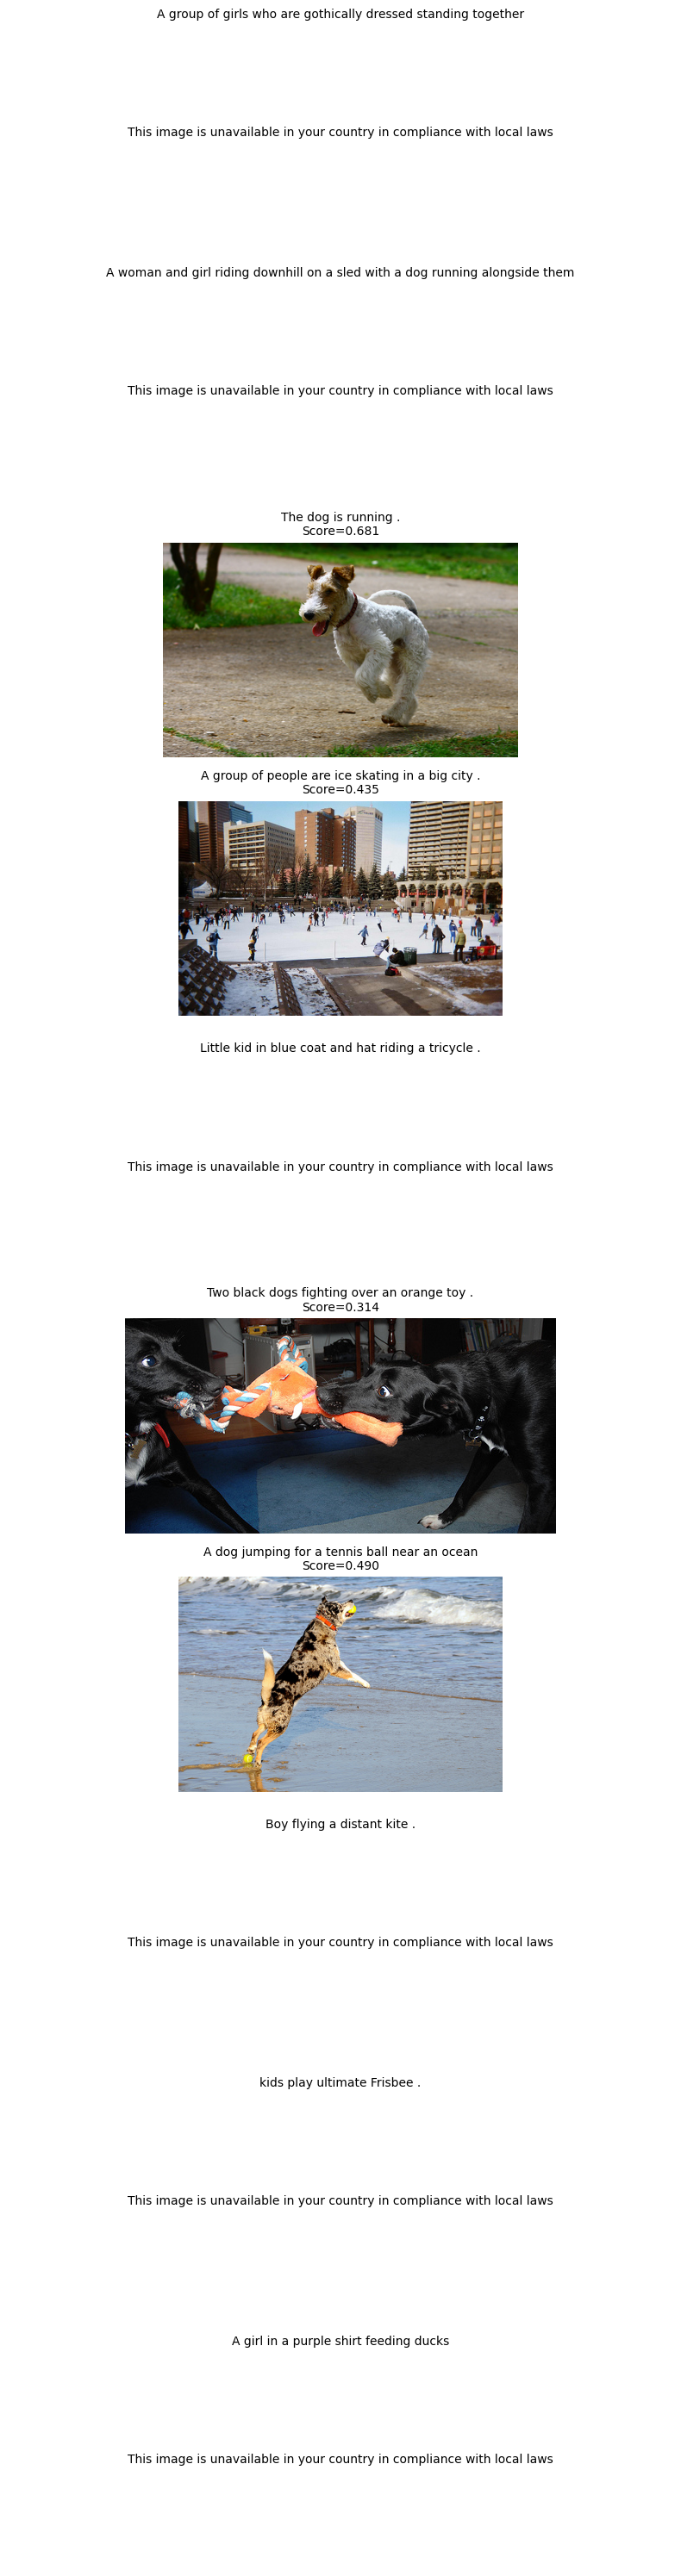

In [ ]:

# 10 случайных уникальных запросов
sample_queries = test_df["query_text"].drop_duplicates().sample(10, random_state=42)

plt.figure(figsize=(8, 30))  # вертикальная фигура

for i, query in enumerate(sample_queries):
    query_df = test_df[test_df["query_text"] == query]
    numeric_rows = query_df[query_df["predicted_target"].apply(lambda x: isinstance(x, float))]

    plt.subplot(10, 1, i+1)  # 10 рядов, 1 колонка

    if not numeric_rows.empty:
        best_row = numeric_rows.loc[numeric_rows["predicted_target"].idxmax()]
        img_path = best_row["image_path"]
        title = f"{query}\nScore={best_row['predicted_target']:.3f}"
        try:
            img = Image.open(img_path).convert("RGB")
            plt.imshow(img)
        except Exception as e:
            plt.text(0.5, 0.5, f"Error loading image\n{e}", ha="center", va="center", fontsize=10)
            plt.axis("off")
        plt.axis("off")
        plt.title(title, fontsize=10)
    else:
        # если все предсказания — дисклеймер
        message = query_df["predicted_target"].iloc[0]
        plt.text(0.5, 0.5, message, ha="center", va="center", wrap=True, fontsize=10)
        plt.axis("off")
        plt.title(query, fontsize=10)

plt.tight_layout()
plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В процессе тестирования ты показываешь просто шикарное качество угадывания картинок. Все изображения идеально соответствуют описаниям.
    
Но по опыту работы с этим проектом скажу тебе, что достигается это не потому, что модель такая хорошая, а потому что в тестовом датасете все изображения идеально подходят друг другу. А твой выбор ограничен только парами из тестового датасета.
    
Поэтому  я попрошу тебя немного переделать логику инференса.
    
Во первых, нужно заранее векторизовать 100 уникальных тестовых изображений.    
    
Далее нужно написать функцию, способную искать изображение по тексту для одного описания. Функция должна уметь работать с любым текстовым описанием.

Что должна делаь функция
    
   - Получать текст
   - Возвращать картинку и метрику близости.
   - Выдавать дисклеймер если запрос некорректный
    
Под капотом функция должна векторизовать полученный текст, и с помощью модели получить предсказание для 100 пар (вектор описания + вектор изображения), где вектор описания мы получили только что, а 100 векторов изображений получили заранее.
    
И дальше ищем изображение, для которого модель покажет максимальную метрику.
    
    
    
---
    
 А затем нужно 10 раз применить функцию к 10 случайным запросам.
    
И не пугайся, если вдруг ты увидишь, что качества угадывания модели  близкое к рандомному угадыванию. К сожалению такое случается, но зато мы будем четко понимать, что функции для инференса работают корректно,  а вот модель "подкачала".    
    
.</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому.
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения.
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0).
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768).
    
   
</div>

## Вывод

демонстрационная система «текст ↔ изображение» (корреляция / вероятность)

 **Цель проекта** - сделать демонстрационную систему «текст ↔ изображение» (корреляция / вероятность). Необходимо построить модель, которая по паре (текст описания, изображение) выдаёт число вероятность/оценку того, насколько изображение соответствует описанию. В качестве таргета использовались комбинированные оценки экспертов/крауда. Также в проекте реализована юридическая фильтрация - для изображений детей до 16 лет на выходе возвращается дисклеймер.

**Что было реализовано**

- Предобработка и фильтрация

- Убраны запрещённые изображения из train (фильтрация по ключевым словам/правилам).

- Для теста сделали маркировку (test_marked) с булевым флагом is_banned.

-  Для получения текстовых эмбеддингов Использовали BERT (bert-base-uncased) для англ языка.
- далее проведена векторизация изображений. В качестве фиче-экстрактора использовали ResNet-18.
- Собрали признаки. Сделали конкатенацию по текстовым эмбеддингам и изображений
- Собрали df_train / df_test с колонками query_id, image_path, target, features (features — список векторов).
- реализовали MLP с архитектурой :Linear(1280,1024) - BatchNorm1d - LeakyReLU/ ReLU - Dropout(0.3) - Linear(1024,512) - BatchNorm? - ReLU - Dropout(0.2) - Linear(512,256) - ReLU - Linear(256,1)
epochs=50, batch_size=64, optimizer=Adam (lr=1e-3), criterion=MSELoss.

Результаты: лучший вариант показал MAE = 0.1305, MSE = 0.0464, RMSE ≈ 0.2154, R² = 0.3042.

Аналогично обработали тестовый датасет:
Для filtered_test посчитаны text + image эмбеддинги → features_test .

- сформировали submission:

Для разрешённых: predicted_target =  предсказание вероятности.

Для запрещённых: predicted_target = "This image is unavailable in your country in compliance with local laws".



<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также проведено тестирование.

    
Пожалуйста отработай все критичные моменты, которые я подсветил красными комментариями.
    
Желтые комментарии на твое усмотрение. Но если ты увидишь, что  наш подход "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
    
Уточняю - CLIP не отменяет необходимость самостоятельных экспериментов с получением эмбеддингов и обучением модели.     
Жду твою работу на повторное ревью.
</div>